In [1]:
## Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
#Inputing the data
calibration = pd.read_csv(r"C:\Users\aorsot1\Desktop\ISIM - Lab 1 Calibration Data - Sheet1.csv")

In [3]:
# Regression between Angle and Voltage 
x = calibration['theta'].values
y = calibration['V(theta)'].values
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
y_pred = reg.predict(X) 
intercept = round(reg.intercept_[0], 2)
slope = round(reg.coef_[0][0], 2)
reg_eq =  'V = {:.2f} + {:.2f}θ'.format(intercept, slope)

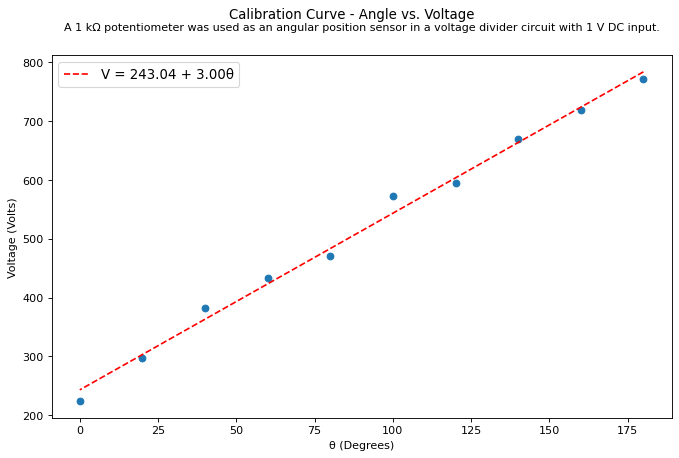

In [4]:
# Calibration Curve
fig = plt.figure(figsize=(10, 6), dpi=80)

plt.plot(X, y_pred, 'r--', label=reg_eq)
plt.scatter(x, y)
plt.title("A 1 kΩ potentiometer was used as an angular position sensor in a voltage divider circuit with 1 V DC input.", 
             y=1.05, fontsize=10)
plt.suptitle("Calibration Curve - Angle vs. Voltage")
plt.xlabel("θ (Degrees)")
plt.ylabel("Voltage (Volts)")
plt.legend(fontsize=12)

plt.show()

fig.savefig("Calibration Curve.png")

In [5]:
motion_data = pd.read_csv(r"C:\Users\aorsot1\Desktop\test.csv")

In [6]:
# Generating list of angles & Voltage
angles = [*range(180, -1, -20)]
raw_volt_data = [772.1, 718.2, 669.8, 595.7, 572.6, 470.8, 432.7, 382.7, 296.4, 223.6]
volts = [item*0.001 for item in raw_volt_data]

In [7]:
# Polynomial computation
fit_coefficients = np.polyfit(volts, angles, 1)

time = motion_data['t1']
voltage = motion_data ['ch1']
theta = fit_coefficients[0]*voltage + fit_coefficients[1]

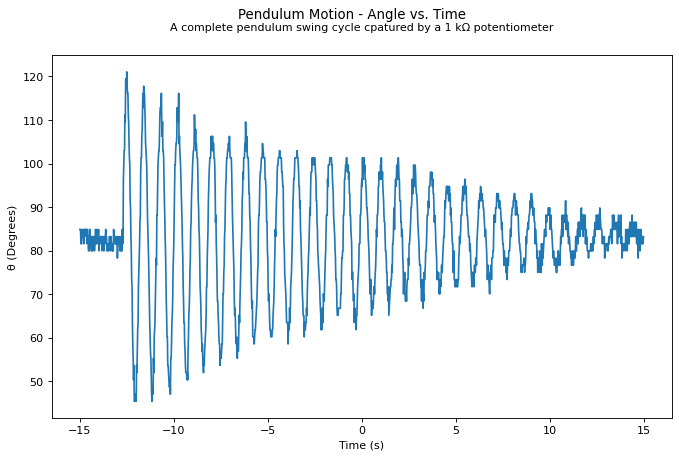

In [8]:
# Pendulum Motion Graph
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time, theta)
plt.title("A complete pendulum swing cycle cpatured by a 1 kΩ potentiometer", 
             y=1.05, fontsize=10)
plt.suptitle("Pendulum Motion - Angle vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("θ (Degrees)")
plt.show()

fig.savefig("Pendulum Motion Graph.png")